**TP1 partie 2 INFO 4248**


---



LISTE DES ETUDIANTS
- GUIFFO WAFFO PATERNE 20V2904
- MONGOUE MFOUT ASSANA COCO 18T2426
- MONGUE NZIE OUSSENA MIGNON 18Y2424
- OWONA FOUDA JEAN EDOUARD 13H2643
---
 Sous la supervision de DR MELATAGIA PAULIN

In [1]:
import numpy as np
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string
import matplotlib.pyplot as plt

In [2]:
# lecture du datasets
data = pd.read_csv("datasets/spam.csv",encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
# selectionner les deux premiere colonnes car les autres sont vides
data= data [['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# mieux afficher les messages
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_2212/471194738.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [7]:
ham,spam=data['v1'].value_counts()

## PRE-TRAITEMENT DES SMS 

In [8]:
#Définition d'une fonction pour ôter la ponctuation
def supprimer_punctuation(text):
    punctuationLibre="".join([i for i in text if i not in string.punctuation])
    return punctuationLibre

In [9]:
#On stocke le text qui n'est plus ponctué
data['v2']= data['v2'].apply(lambda x:supprimer_punctuation(x))

#Affichage pour vérification
data.head()

,v1,v2
0,ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives around here though


In [10]:
#Transformation du texte en minuscules
data['v2']= data['v2'].apply(lambda x: x.lower())

In [11]:
#Affichage pour vérification
data.head()

,v1,v2
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives around here though


In [12]:
# tokenisation de phrase en mot: transforme la phrase en liste de mot
import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
data['token']= data['v2'].apply(lambda x: tokenization(x))


In [13]:
try:
    stopwords = nltk.corpus.stopwords.words('english')
except:
    nltk.download('stopwords')
    stopwords = nltk.corpus.stopwords.words('english')
print(f'quelques mots considerés comme vide de sens {stopwords[0:10]}')

quelques mots considerés comme vide de sens ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [14]:
# fonction qui permet de suprimer les mots vides de sens
def supprime_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [15]:
# Suppression des mots vides de sens
data['stop_word']= data['token'].apply(lambda x:supprime_stopwords(x))

In [16]:
data.head()

,v1,v2,token,stop_word
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


In [17]:
porter_stemmer = PorterStemmer()
# Cette fonction permet de transformer les mots dans leurs sens premiers
def sensPremier(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [18]:
data['primitive']=data['stop_word'].apply(lambda x: sensPremier(x))
data.head()

,v1,v2,token,stop_word,primitive
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [19]:
# Recuperons un objet lematisation ou telechargeons si le paquet n'existe pas
try:
    wordnet_lemmatizer = WordNetLemmatizer()
except:
    nltk.download('wordnet')
    wordnet_lemmatizer = WordNetLemmatizer()
        

In [20]:
def lemmatisation(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['lem']=data['primitive'].apply(lambda x:lemmatisation(x))

In [21]:
data.head()

,v1,v2,token,stop_word,primitive,lem
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [22]:
data_clean = data[['v1','lem']]
# data_clean = data

In [23]:
data_clean.head()

,v1,lem
0,ham,"[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, dont, think, goe, usf, live, around, though]"


#### recuperation de la list des mots utilises sous forme de list pour mieux le traité

In [24]:
msg_lemmatizedList = data_clean['lem'].tolist()

In [25]:
globalList = list()
for i in msg_lemmatizedList:
    globalList.extend(i)

In [26]:
from collections import Counter
# new_A = map(tuple, globalList)

final_count = Counter(globalList)

In [27]:
len(final_count)

8039

In [28]:
ocurences_df = pd.DataFrame.from_dict(final_count,orient='index',
                       columns=['occ'])

In [29]:
y=list()
for i in range(2,20):
    occ=ocurences_df[ocurences_df['occ']>i]
    y.append(occ.shape[0])

(0.0, 21.0)

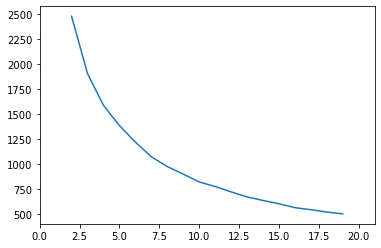

In [30]:
plt.plot(range(2,20),y)
plt.xlim(0,21)

In [31]:
occ_lim = 7
occ=ocurences_df[ocurences_df['occ']>occ_lim]

In [32]:
rownames_occ = list(occ.index)
rownames = list(ocurences_df.index)

In [33]:
len(rownames)

8039

i=0
for rowname in rownames:
    p = ocurences_df['occ'][i]/data.shape[0]
    i += 1
    data_clean[rowname] = data_clean['v2'].apply(lambda x: p if rowname in x else 1-p)

----
## CONTRUCTION DU RESEAU DE BAYES

In [34]:
for rowname in rownames:
    data_clean[rowname] = data_clean['lem'].apply(lambda x: x.count(rowname) if rowname in x else 0)

/tmp/ipykernel_2212/1087019414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[rowname] = data_clean['lem'].apply(lambda x: x.count(rowname) if rowname in x else 0)
/tmp/ipykernel_2212/1087019414.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_clean[rowname] = data_clean['lem'].apply(lambda x: x.count(rowname) if rowname in x else 0)


In [35]:
data_clean.head()

,v1,lem,go,jurong,point,crazi,avail,bugi,n,great,...,4year,dental,nmde,dump,heap,salesman,087187272008,now1,piti,soani
0,ham,"[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[ok, lar, joke, wif, u, oni]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[nah, dont, think, goe, usf, live, around, though]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df = data_clean.drop(['lem'],axis=1)

In [37]:
data_ham = df[df['v1']=='ham']
data_spam = df[df['v1']=='spam']

In [38]:
data_spam.shape

(747, 8040)

In [39]:
df.head()

,v1,go,jurong,point,crazi,avail,bugi,n,great,world,...,4year,dental,nmde,dump,heap,salesman,087187272008,now1,piti,soani
0,ham,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# calculer le nombre d'ocuurences de chaque mot dans le messages
# calculer la frequence et la probabilite de chaque mot pour classe
# calculer les probabilite a priori

class NaiveBayes:
    def __init__(self,df,features):
        self.n_samples, self.n_features = df.shape
        self.ham = df[df['v1']=='ham']
        self.spam = df[df['v1']=='spam']
        self.ham =  self.ham .drop(['v1'],axis=1)
        self.spam =  self.spam.drop(['v1'],axis=1)
        self.n_features = len(features)
        self.features = features
        self.priors_ham = pd.DataFrame(features,columns=['features'])
        self.priors_spam = pd.DataFrame(features,columns=['features'])
        self.priors_ham['p'] = [np.sum(self.ham[feature])/self.ham.shape[0] for feature in features]
        self.priors_spam['p'] = [np.sum(self.spam[feature])/self.spam.shape[0] for feature in features]
        
    def fit(self, X,Y):
        pass
        # self.classe = np.unique(y)
        # self.n_classes = len(self.classe)
        # self.priors = np.sum(X, axis=0)/ x.shape[0]
        # if self.priors.shape[0]== 1 or self.priors.shape[0]== null:
        #   self.priors = self.priors.T
 
    def predict(self, message):
        result = {
            'ham':0,
            'spam':0
                 }
        if isinstance(message,list):
            p_ham= self.ham.shape[0]/self.n_samples
            p_spam= self.spam.shape[0]/self.n_samples
            for word in message:
                p_ham *= np.sum(self.priors_ham.loc[self.priors_ham['features']==word,"p"])
                p_spam *= np.sum(self.priors_spam.loc[self.priors_spam['features']==word,"p"])
            result['ham']= p_ham
            result['spam'] = p_spam
            return result
        else:
            raise 'faites le pretraitement du message d\'abord'
        

In [41]:
X = df.drop(['v1'],axis=1)
Y = df['v1']
X.head()

,go,jurong,point,crazi,avail,bugi,n,great,world,la,...,4year,dental,nmde,dump,heap,salesman,087187272008,now1,piti,soani
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
naif = NaiveBayes(df,features=rownames)

In [43]:
naif.fit(X,Y)

In [44]:
naif.predict(['jurong', 'point','crazi', 'avail', 'bugi'])

{'ham': 5.122593985187344e-15, 'spam': 0.0}

In [45]:
naif.features[0:10]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la']

In [46]:
naif.priors_ham.head()


,features,p
0,go,0.085803
1,jurong,0.000207
2,point,0.003523
3,crazi,0.002073
4,avail,0.002694


In [47]:
naif.priors_spam.head()

,features,p
0,go,0.046854
1,jurong,0.000000
2,point,0.021419
3,crazi,0.006693
4,avail,0.004016


In [48]:
np.sum(naif.priors_ham.loc[naif.priors_ham['features']=='go',"p"])

0.08580310880829016

In [49]:
p_ham= naif.ham.shape[0]/naif.n_samples
p_spam= naif.spam.shape[0]/naif.n_samples
print(f' probabilite ham = {p_ham}et spam={p_spam}')

 probabilite ham = 0.8659368269921034et spam=0.13406317300789664


In [50]:
for word in ['jurong', 'point','crazi', 'avail', 'bugi']:
    p_ham *= np.sum(naif.priors_ham.loc[naif.priors_ham['features']==word,"p"])
    p_spam *= np.sum(naif.priors_spam.loc[naif.priors_spam['features']==word,"p"])

In [51]:
print(f' probabilite ham = {p_ham}et spam={p_spam}')

 probabilite ham = 5.122593985187344e-15et spam=0.0
